# Classification

In this lecture, we will present a selection of **classification** techniques. 

The classification techniques we will present are supervised learning techniques. However, unlike regression, their output is either a discrete label, chosen among a certain finite set of possible values, or the probability to obtain a certain outcome, again among the set of possible values. 

If this sounds a bit abstract, let us make an example of both type of categorisation. In one case, we would like to predict, based on the value of certain physical quantities, if a material will be a gas, a liquid, a solid or a liquid crystal once synthesised at room temperature. In this case, the predicted outcome is one of four distinct labels.<br>

A slightly different case would be if we want to predict the probability of failure 
of a turbine blade within the next 10 years (or any chosen time point). In this case, we have two mutually exclusive outcomes (the blade either fails within that time-frame, or not) but we want to estimate the probability of observing one of the two, which is a continuous number, not a distinct label like in the previous case. 

In all truth, the distinction between these different types of categorisation is somewhat not that strong. For example, one can simply decide to assign as a discrete label the one with the highest probability (or randomly picking the label according to the predicted probability) transforming a method to estimate probability into a method for assignment of a discrete label. 

## Logistic Regression

Despite its name, logistic regression is a classification analysis technique that is based on the **logistic equation**.

\begin{align}
f(n) = \frac{1}{1+e^{-n}}
\end{align}

This function takes a value of $0$, when $n$ tends to negative infinity, and a value of $1$ when $n$ tends to positive infinity. When $n=0$, the value of the logistic function is equal to $0.5$.

| n | value |
|:---:|:---:|
| $$-\infty$$ |0|
|0|0.5|
|$$\infty$$|1|

Below we can plot this equation:

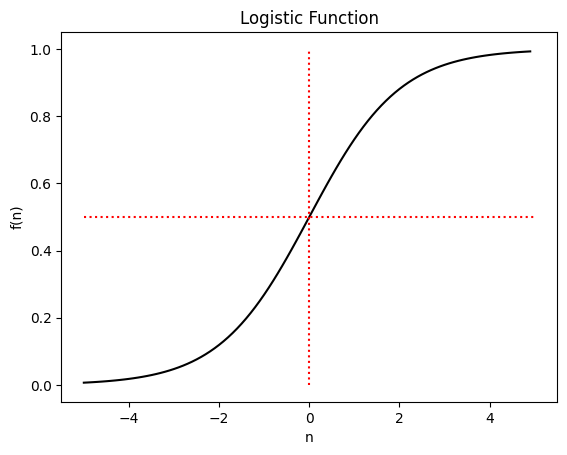

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logistic(x: np.ndarray) -> np.ndarray:
    """Executes the logistic function on an array 
    and returns the result in a new array"""
    return 1.0 / (1 + np.exp(-x))

n = np.arange(-5, 5, 0.1)
f = logistic(n)

fig, ax = plt.subplots()
ax.plot(n, f, 'k-')
ax.plot([0, 0], [0, 1], 'r:')
ax.plot([-5, 5], [0.5, 0.5], 'r:')
ax.set_xlabel('n')
ax.set_ylabel('f(n)')
ax.set_title('Logistic Function')
None

Since the values of the logistic function are between zero and one, it should probably not come as a surprise that **logistic regression is used to predict the probability of a certain binary event**. 

The basic idea behind logistic regression is the following. For a binary event, the "odds" (O) are defined as the ratio between its occurence $p$, divided by the probability it does not $(1-p)$, or:

\begin{equation}
O = \frac{p}{1-p}
\end{equation}

This function ranges between 0, when the event has zero probability, and infinity, in case the event happens with certainty. Assume now that the logarithm of this probability is given by a linear function of the independent variables we are using to predict the outcome:

\begin{equation}
\log( O ) = \beta_0 + \sum_i \beta_i x_i = L(\{\beta\})
\end{equation}

With this formula, the coefficient $\beta_i$ is related to how much the odds grow, given a change in the related variable $x_i$. In fact, for a change in $x_i$ by 1, the odds grow by $exp(\beta_i)$. Instead, $\beta_0$ is basically the value of the odds when every single variable $x_i$ is equal to 0.

Given the previous formula for the odds, with some simple algebra one can derive:

\begin{equation}
p = \frac{1}{1+e^{-L}}
\end{equation}

(remember that $p$ is the probability that the binary event we want to model indeed occurs). In other words, $p$ is described by the logistic function.<br> 

The formal justification of this specific functional form is rooted again in information theory but we won't discuss it here.  
What is sufficient to remember is that, similarly to what happens in linear regression, the coefficients $\beta$ are optimised in such a way to maximise the predictivity of the model. In fact, because the log of the odds is a linear function in the $\beta$s, we can use exactly the same optimisation algorithms introduced for linear regression to estimate their best estimate / fitting values!

## An example

Even if not immediately clear, sometimes data can be interpreted in terms of a logistic regression model. In fact, **you can re-map your question into a logistic regression model every time that the outcome of the event to be predicted is binary**. 

If you know that you can be only in state $A$ or state $B$, you can decide to model the probability $P(A)$, or $P(B)$, simply because the probability of not being in this state is equivalent to being in the other $P(B) = P(\bar{A}) = 1 - P(A)$.

We will try to give an explicit example here below: we model the probability of being in either of two locations, Mount Gini or Darwin, based on the observed temperature. In practice, we decide to model the probability of being in Darwin (knowing that if we are not in Darwin, we must be in Mount Gini!). 

In [3]:
data = pd.read_csv('data tasks/501-weather-logistic.csv')
data['Darwin'] = data['Location'].apply(lambda x: 1.0 if x == 'Darwin' else 0.0)
data = data.dropna()
data = data.sort_values(by='MaxTemp').reset_index(drop=True)
print(data)

         Location  MaxTemp  Darwin
0     MountGinini     -4.8     0.0
1     MountGinini     -4.1     0.0
2     MountGinini     -3.8     0.0
3     MountGinini     -3.7     0.0
4     MountGinini     -3.2     0.0
...           ...      ...     ...
6174       Darwin     37.4     1.0
6175       Darwin     37.5     1.0
6176       Darwin     37.5     1.0
6177       Darwin     37.8     1.0
6178       Darwin     38.0     1.0

[6179 rows x 3 columns]


Text(0, 0.5, 'Location')

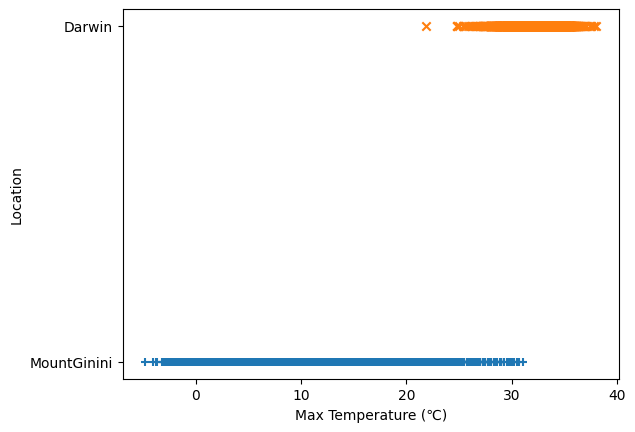

In [4]:
fig, ax = plt.subplots()

# plot MountGinini data
subset_mg = data[data['Location'] == 'MountGinini']
ax.scatter(subset_mg['MaxTemp'], subset_mg['Location'], marker='+')

# plot Darwin data
subset_dw = data[data['Location'] == 'Darwin']
ax.scatter(subset_dw['MaxTemp'], subset_dw['Location'], marker='x')

# label axes
ax.set_xlabel('Max Temperature (℃)')
ax.set_ylabel('Location')

In [5]:
from sklearn.linear_model import LogisticRegression

# convert the data to numpy arrays
X = data['MaxTemp'].to_numpy().reshape(-1, 1) # use array.reshape(-1, 1) to convert 1D array to 2D array
y = data['Darwin'].to_numpy()

# create regressor objects
logistic = LogisticRegression().fit(X, y)

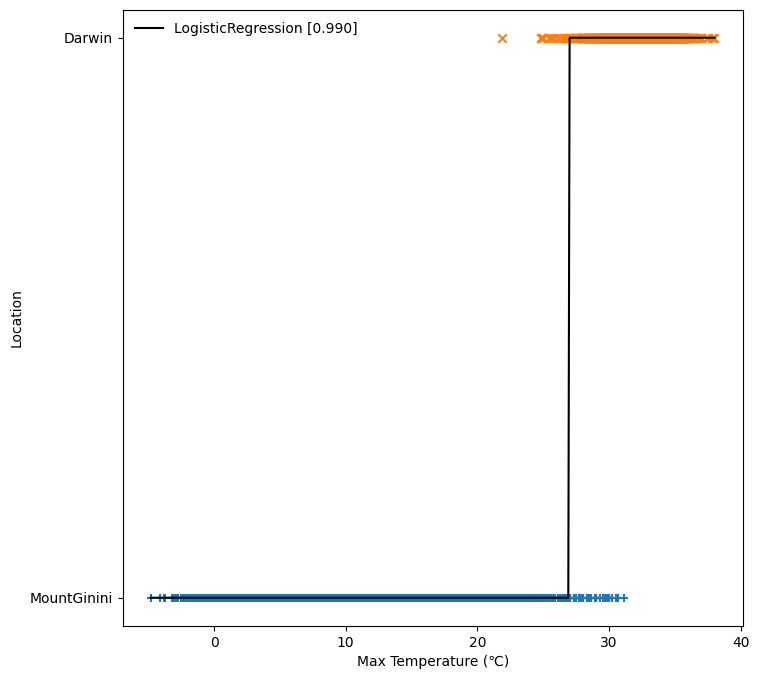

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot MountGinini data
ax.scatter(subset_mg['MaxTemp'], subset_mg['Location'], marker='+')

# plot Darwin data
ax.scatter(subset_dw['MaxTemp'], subset_dw['Location'], marker='x')

# plot LogisticRegression fit
ax.plot(X, logistic.predict(X), 'k-', label=f'LogisticRegression [{logistic.score(X, y):.3f}]' )

ax.set_xlabel('Max Temperature (℃)')
ax.set_ylabel('Location')
ax.legend(frameon=False)

None

## Food for thought

**What about when the outcome of our model is not binary?** 

Considering the example above, what if we knew the temperature was recorded at 3 different places rather than a single one? In this case, we would need to use a so-called multinomial logistic regression model.

Building a multinomial model can be done easily **by re-casting the problem as a set of binary problems**, which is a valid approach if the so-called [independence of irrelevant alternatives" (IIA)](https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives#:~:text=In%20social%20choice%20theory%2C%20IIA,s%20being%20selected%20over%20A.) assumption is correct (something that will depend on the system to model). In practice, IIA states that the odds of preferring one class over another do not depend on the presence or absence of other irrelevant alternatives.  

Considering the example we made about Mount Ginini vs Darwin, IIA is equivalent to saying that the probability to be in one specific location does not depend on which are the other alternatives. You can see immediately that this might not be a very good assumption in certain cases: The probability that you will stay at home studying during the week-end, or else go somewhere else, probably depends on what "somewhere else" is, that is, what are the other alternatives available to you for the week-end!

Assuming that the IIA assumption holds, if your model had three potential outcomes $A,B$ and $C$, you can first use logistic regression to estimate the probability of obtaining $A$, or not (this is a binary event). Then you can estimate the probability of being in $B$, or not (another binary event), given that you are not in $A$. These two estimations close the problem because if you are neither in $A$ nor in $B$, then you must be in $C$! This procedure can be obviously reiterated given any finite number of alternatives.<br>

Because in practice IIA is often not verified, we do not discuss the extension of the logistic regression to multiple outcomes, as this is best used for modelling of truly binary events. When multiple outcomes are possible, other classification models are better suited, which we will present in the next section.